In [1]:
import pandas as pd

from geo_model2 import GeoModel
import network_analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib as mpl
import scipy.stats as stats

## Neighbourhood Influence only

In [2]:
# # simulate
seed = 187758
parameters = {"cost_clean": .4, "cost_dirty":.2, "base_output_dirty":0.4, "base_output_clean":0.2,
                 "metabolism_scalar_energy":1, "metabolism_scalar_money":1, "eta_global_trade":0.01,
                 "predisposition_decrease":0.000_05, "pareto_optimal":False, "seed":seed, "prob_neigh_influence" : 0,'tax': False}
# x_probs = np.linspace(0,1,num=20)
# n_simulations = 20
# shape = (len(x_probs),n_simulations)
#
# welfares_test = np.empty(shape)
# print(welfares_test.shape)
# gini_vals = np.empty(shape)
# modularity_vals = np.empty(shape)
# for idx1 in range(n_simulations):
#     for idx2, x in enumerate(x_probs):
#         args = parameters.copy()
#         args["prob_neigh_influence"] = x
#
#         cur_model = GeoModel(**args) # 1000 runs
#         cur_model.run_model(1000)
#         data = cur_model.datacollector.get_model_vars_dataframe().iloc[-1]
#         welfares_test[idx2, idx1] = data.Welfare
#         modularity_vals[idx2, idx1] = data.modularity_ga
#         gini_vals[idx2, idx1] = data.Gini_welfare
#
#     print("sim", idx1+2)

In [36]:
# # simulate
seed = 187758
seed = 182
parameters = {"cost_clean": .4, "cost_dirty":.1, "base_output_dirty":0.4, "base_output_clean":0.2,
                 "metabolism_scalar_energy":1, "metabolism_scalar_money":1, "eta_global_trade":0.01,
                 "predisposition_decrease":0.000_5, "pareto_optimal":False, "seed":seed, "prob_neigh_influence" : 0,'tax': False}
cur_model = GeoModel(**parameters) # 1000 runs
cur_model.run_model(140)
data = cur_model.datacollector.get_model_vars_dataframe()

/Users/paulhosek/PycharmProjects/Agent_based_modeling/country2.py:180: RuntimeWarning: invalid value encountered in power
  return np.power(self.w_energy + self.produced_energy + add_energy, self.m_energy / mt) \
/Users/paulhosek/opt/anaconda3/envs/Agent_based_modeling/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 3 islands with ids: 1, 3, 17.
  warnings.warn(message)


In [40]:
wealth_only_a = cur_model.datacollector.get_agent_vars_dataframe().pivot_table(values='Welfare', columns='AgentID', index='Step')

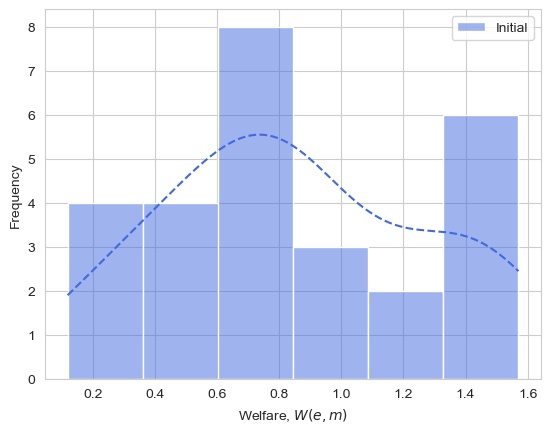

In [41]:
wealth_only_a = cur_model.datacollector.get_agent_vars_dataframe().pivot_table(values='Welfare', columns='AgentID', index='Step')

plt.figure()
sns.histplot(wealth_only_a.iloc[0], color="royalblue", alpha=0.5, label="Initial", kde=True, line_kws = {'color':'black','linestyle': 'dashed'})
sns.histplot(wealth_only_a.iloc[-1], color="black", alpha=0.3, label="Equilibrium", kde=True, line_kws = {'color':'black','linestyle': 'dashed'})
plt.ylabel("Frequency")
plt.xlabel(r"Welfare, $W(e,m)$")
plt.legend()
plt.savefig("figures/Distribution_welfare.png", dpi = 300, bbox_inches="tight")

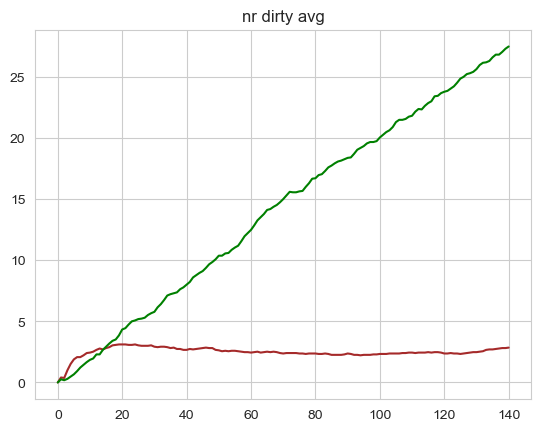

In [37]:
data = cur_model.datacollector.get_model_vars_dataframe()
plt.figure()
plt.title("nr dirty avg")
plt.plot(data["nr_dirty"], color='brown')
plt.plot(data["nr_clean"], color='green')
plt.show()

In [ ]:
# np.savetxt("data/ex1_welfare_20_20_1000_ntv2.csv",welfares_test , delimiter=",")
# np.savetxt("data/ex1_gini_20_20_1000_ntv2.csv",modularity_vals , delimiter=",")
# np.savetxt("data/ex1_modul_20_20_1000_ntv2.csv",gini_vals , delimiter=",")

In [ ]:
# # simulate
# seed = 187758
# parameters = {"cost_clean": .4, "cost_dirty":.2, "base_output_dirty":0.4, "base_output_clean":0.2,
#                  "metabolism_scalar_energy":1, "metabolism_scalar_money":1, "eta_global_trade":0.01,
#                  "predisposition_decrease":0.000_05, "pareto_optimal":False, "seed":seed, "prob_neigh_influence" : 0,'tax': True}
# x_probs = np.linspace(0,1,num=20)
# n_simulations = 20
# shape = (len(x_probs),n_simulations)
#
# welfares_test = np.empty(shape)
# print(welfares_test.shape)
# gini_vals = np.empty(shape)
# modularity_vals = np.empty(shape)
# for idx1 in range(n_simulations):
#     for idx2, x in enumerate(x_probs):
#         args = parameters.copy()
#         args["prob_neigh_influence"] = x
#
#         cur_model = GeoModel(**args) # 1000 runs
#         cur_model.run_model(1000)
#         data = cur_model.datacollector.get_model_vars_dataframe().iloc[-1]
#         welfares_test[idx2, idx1] = data.Welfare
#         modularity_vals[idx2, idx1] = data.modularity_ga
#         gini_vals[idx2, idx1] = data.Gini_welfare
#
#     print("sim", idx1+2)

In [ ]:
# np.savetxt("data/ex2_welfare_20_20_1000_TAXv2.csv",welfares_test , delimiter=",")
# np.savetxt("data/ex2_gini_20_20_1000_TAXv2.csv",modularity_vals , delimiter=",")
# np.savetxt("data/ex2_modul_20_20_1000_TAXv2.csv",gini_vals , delimiter=",")

In [ ]:
def raw_to_ci_mean(data, confidence_level = 1.96):
    """Convert 2d np array to ci and mean."""
    mean = np.mean(data, axis=1)
    sem = np.std(data, axis=1) / np.sqrt(data.shape[1])
    low = mean - confidence_level*sem
    high = mean + confidence_level*sem
    return mean, low, high

def draw_line_ci(cur_mean,low,high, x_vals = None, label = 'None', color='blue'):
    if not x_vals:
        x_vals = range(len(cur_mean))



In [ ]:
# np.savetxt("data/ex2_welfare_20_20_1000_TAX_test.csv",welfares_test , delimiter=",")
# np.savetxt("data/ex2_gini_20_20_1000_TAX_test.csv",modularity_vals , delimiter=",")
# np.savetxt("data/ex2_modul_20_20_1000_TAX_test.csv",gini_vals , delimiter=",")

# Experiment 1

In [ ]:
no_tax_w = np.loadtxt("data/ex1_welfare_20_20_1000_ntv2.csv", delimiter=",")
no_tax_g = np.loadtxt("data/ex1_gini_20_20_1000_ntv2.csv", delimiter=",")
no_tax_m = np.loadtxt("data/ex1_modul_20_20_1000_ntv2.csv", delimiter=",")

w_mean_nt, w_low_nt, w_high_nt = raw_to_ci_mean(no_tax_w)
g_mean_nt, g_low_nt, g_high_nt = raw_to_ci_mean(no_tax_g)
m_mean_nt, m_low_nt, m_high_nt = raw_to_ci_mean(no_tax_m)

x_probs = np.linspace(0,1,num=20)

x_vals = x_probs
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

plt.figure(figsize=(7,6))

ax1 = sns.lineplot(x= x_vals,y = m_mean_nt, label='Modularity',color= 'Red', linestyle="--")

sns.scatterplot(x= x_vals,y = m_mean_nt, color= 'Red', ax=ax1)
ax1.fill_between(x_vals,m_low_nt, m_high_nt, alpha=0.2, color='Red')
ax2 = ax1.twinx()
sns.lineplot(x= x_vals,y = g_mean_nt, label="Gini",color= 'blue', ax=ax2)
sns.scatterplot(x= x_vals,y = g_mean_nt, color= 'blue', ax=ax2)
ax2.fill_between(x_vals,g_low_nt, g_high_nt, alpha=0.2, color='blue')


ax2.legend([],[],frameon=False)
ax2.grid(None)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax1.legend(lines + lines2, labels + labels2, loc='upper right', framealpha=1, prop={'size': 14})
leg.get_frame().set_edgecolor('black')
ax2.spines['right'].set_color('red')
ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines['right'].set_linewidth(2)
ax2.set_ylabel(r"Modularity, $Q$")
ax1.set_ylabel(r"Gini, $G$")
ax1.set_xlabel(r"Prob. Neighbourhood influence, $P(N)$")
plt.savefig("figures/Ex1_p1.svg",dpi=300,bbox_inches='tight')

In [ ]:
# Test when difference is significant between 0 and 1
pearson_gini = stats.pearsonr(g_mean_nt, x_probs)
pearson_modularity = stats.pearsonr(m_mean_nt, x_probs)
print("Gini", pearson_gini)
print("Modularity", pearson_modularity)


In [ ]:
plt.figure(figsize=(8,6))
ax1 = sns.lineplot(x= x_vals,y = w_mean_nt, label='Welfare',color= 'Green')
sns.scatterplot(x= x_vals,y = w_mean_nt, color= 'Green', ax=ax1)
ax1.fill_between(x_vals,w_low_nt, w_high_nt, alpha=0.2, color='Green')

leg = ax1.legend( loc='lower right', framealpha=1, prop={'size': 14})
leg.get_frame().set_edgecolor('black')
ax1.set_ylabel(r"Welfare, $\operatorname{W}(e,m)$")
ax1.set_xlabel(r"Prob. Neighbourhood influence, $P(N)$")
plt.savefig("figures/Ex1_p2.svg",dpi=300,bbox_inches='tight')

## Experiment 2

In [ ]:
no_tax_w = np.loadtxt("data/ex1_welfare_20_20_1000_ntv2.csv", delimiter=",")
no_tax_g = np.loadtxt("data/ex1_gini_20_20_1000_ntv2.csv", delimiter=",")
no_tax_m = np.loadtxt("data/ex1_modul_20_20_1000_ntv2.csv", delimiter=",")

tax_w = np.loadtxt("data/ex2_welfare_20_20_1000_TAXv2.csv", delimiter=",")
tax_g = np.loadtxt("data/ex2_gini_20_20_1000_TAXv2.csv", delimiter=",")
tax_m = np.loadtxt("data/ex2_modul_20_20_1000_TAXv2.csv", delimiter=",")

In [ ]:
w_mean_nt, w_low_nt, w_high_nt = raw_to_ci_mean(no_tax_w)
g_mean_nt, g_low_nt, g_high_nt = raw_to_ci_mean(no_tax_g)
m_mean_nt, m_low_nt, m_high_nt = raw_to_ci_mean(no_tax_m)

w_mean_t, w_low_t, w_high_t = raw_to_ci_mean(tax_w)
g_mean_t, g_low_t, g_high_t = raw_to_ci_mean(tax_g)
m_mean_t, m_low_t, m_high_t = raw_to_ci_mean(tax_m)

x_vals = x_probs
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

plt.figure(figsize=(8,6))

ax1 = sns.lineplot(x= x_vals,y = m_mean_t - m_mean_nt, label=r'$\Delta$ Modularity',color= 'Red', linestyle="--")
sns.scatterplot(x= x_vals,y = m_mean_t - m_mean_nt, color= 'Red', ax=ax1)
ax1.fill_between(x_vals,m_low_t - m_low_nt, m_high_t - m_high_nt, alpha=0.2, color='Red')
ax2 = ax1
sns.lineplot(x= x_vals,y = g_mean_t - g_mean_nt, label=r"$\Delta$ Gini",color= 'blue', ax=ax2)
sns.scatterplot(x= x_vals,y = g_mean_t - g_mean_nt, color= 'blue', ax=ax2)
ax2.fill_between(x_vals,g_low_t - g_low_nt, g_high_t - g_high_nt, alpha=0.2, color='blue')
ax2.axhline(0,color="black")





lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax1.legend(lines, labels , loc='upper right', framealpha=1, prop={'size': 14})
leg.get_frame().set_edgecolor('black')

ax1.set_ylabel(r"Taxation Impact , $\Delta \ Tax$")
ax1.set_xlabel(r"Prob. Neighbourhood influence, $P(N)$")
plt.savefig("figures/Ex2_p1.svg",dpi=300,bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,6))
ax1 = sns.lineplot(x= x_vals,y = w_mean_t, label='Tax',color= 'Green',linestyle='--')
sns.scatterplot(x= x_vals,y = w_mean_t, color= 'Green', ax=ax1)
ax1.fill_between(x_vals,w_low_t, w_high_t, alpha=0.2, color='Green')

sns.lineplot(x= x_vals,y = w_mean_nt, label='No Tax',color= 'Grey',ax=ax1)
sns.scatterplot(x= x_vals,y = w_mean_nt, color= 'Grey', ax=ax1)
ax1.fill_between(x_vals,w_low_nt, w_high_nt, alpha=0.2, color='black')

leg = ax1.legend( loc='lower right', framealpha=1, prop={'size': 14})
leg.get_frame().set_edgecolor('black')
ax1.set_ylabel(r"Welfare, $\operatorname{W}(e,m)$")
ax1.set_xlabel(r"Prob. Neighbourhood influence, $P(N)$")
plt.savefig("figures/Ex2_p2.svg",dpi=300,bbox_inches='tight')


In [ ]:
pearson_gini = stats.pearsonr(g_mean_t-g_mean_nt, x_probs)
pearson_modularity = stats.pearsonr(m_mean_t-m_mean_nt, x_probs)
print("Pearson's r for delta tax.")
print("Gini", pearson_gini)
print("Modularity", pearson_modularity)

# t-test with unequal variance for all values
pvals = np.empty(20)

for i in range(20):
    no = no_tax_w[:,i]
    t = tax_w[:,i]
    pvals[i] = stats.ttest_ind(no,t, equal_var= False)[1]
print("P-values for matched pairs analysis of welfare values before and after tax.")
print(pvals)
print(np.mean(pvals))

# Networks

In [ ]:
seed = 187758
parameters = {"cost_clean": .4, "cost_dirty":.2, "base_output_dirty":0.4, "base_output_clean":0.2,
                 "metabolism_scalar_energy":1, "metabolism_scalar_money":1, "eta_global_trade":0.01,
                 "predisposition_decrease":0.000_05, "pareto_optimal":False, "seed":seed, "prob_neigh_influence" : 0}

cur_model = GeoModel(**parameters) # 1000 runs
cur_model.run_model(1000)
data = cur_model.datacollector.get_model_vars_dataframe().iloc[-1]
a_data = cur_model.datacollector.get_agent_vars_dataframe()

In [ ]:
weights = a_data.pivot_table(values='w_money', columns='AgentID', index='Step')
weights_dict = weights.iloc[-1].to_dict()
weights_dict

In [ ]:
eu_graph = network_analysis.import_eu_graph()
communities = nx.algorithms.community.louvain_communities(eu_graph)

def get_edge_attributes(G, name):
    # ...
    edges = G.edges(data=True)
    return dict( (x[:-1], x[-1][name]) for x in edges if name in x[-1] )


eu_graph = network_analysis.similarity_weighting(eu_graph,weights_dict)


### PLOTTING ####
# Create a dictionary mapping each node to its community id
community_dict = {}
for cid, community in enumerate(communities):
    for node in community:
        community_dict[node] = cid


# PLOTTING
node_cmap = plt.cm.Accent
edge_cmap = plt.cm.Greys
col_list = ['lightblue', 'lightgreen', 'yellow', 'lightpink', 'lightcoral', 'lightyellow', 'palegreen', 'paleturquoise', 'lemonchiffon', 'lavender', 'honeydew', 'mintcream', 'papayawhip', 'blanchedalmond', 'oldlace']
pastel = ['lavender', 'mintcream', 'peachpuff', 'pink', 'mistyrose', 'beige', 'khaki', 'lemonchiffon', 'ivory', 'azure', 'honeydew', 'aliceblue', 'lavenderblush', 'seashell']
desinct_dark = ['black', 'dimgray', 'darkslategray', 'darkred', 'maroon', 'darkolivegreen', 'olivedrab', 'darkgreen', 'darkblue', 'navy', 'indigo', 'purple', 'darkmagenta', 'brown', 'sienna']
mid_dark =['orangered', 'indigo', 'darkgreen', 'lightcoral', 'rosybrown', 'lightgreen', 'green', 'lightseagreen', 'lightblue', 'dodgerblue', 'slateblue', 'mediumslateblue', 'violet', 'peru', 'sandybrown']

node_cmap = mpl.colors.ListedColormap(mid_dark, name='from_list', N=None)
# sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap=cmap)

# Create a color map for the communities
num_communities = len(communities)
colors = np.array(node_cmap(np.linspace(0, 1, num_communities)))
color_map = {cid: color for cid, color in enumerate(colors)}
# TODO replace this later


# Set the color attribute for each node in the graph
nx.set_node_attributes(eu_graph, values=color_map, name='color')

pos = nx.spring_layout(eu_graph, k=0.4,seed=143, weight=None) # seed




weights = [d['weight'] for (u, v, d) in eu_graph.edges(data=True)]
# Normalize the edge weights to get colors
normalized_weights = (weights - min(weights)) / (max(weights) - min(weights))
weights_cols = np.array(normalized_weights)


# Edges
colors = [color_map[community_dict[node]] for node in eu_graph.nodes()]
network = nx.draw(eu_graph, pos,node_size=[v * 50 + 20 for v in dict(eu_graph.degree).values()],
        width=2,edge_cmap=edge_cmap,edge_color=weights_cols, node_color=colors, with_labels=True,font_size=11, horizontalalignment= "left",verticalalignment="bottom")

# Colorbar

sm = plt.cm.ScalarMappable(cmap=edge_cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=np.arange(0, 1.1, 0.1))
cbar.set_ticks(np.arange(0, 1, 0.1))
cbar.set_ticklabels(np.around(np.arange(0, 1, 0.1), 1))
cbar.set_label('Similarity')

plt.savefig("figures/Ex2_network.svg",dpi=300,bbox_inches='tight')